# Advanced Data Visualization with Seaborn and Plotly

## Learning Objectives
- Learn how to use Seaborn and Plotly for advanced and interactive visualizations
- Apply statistical visualization techniques

---

## Setup and Data Loading
We'll use the classic **Iris dataset** for its simplicity and clean structure, ideal for multi-variate visualization.


In [2]:
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

iris = sns.load_dataset("iris")

---

## Example 1: Seaborn Pairplot for Visualizing Relationships

**Goal:** Explore relationships between numerical variables grouped by species.

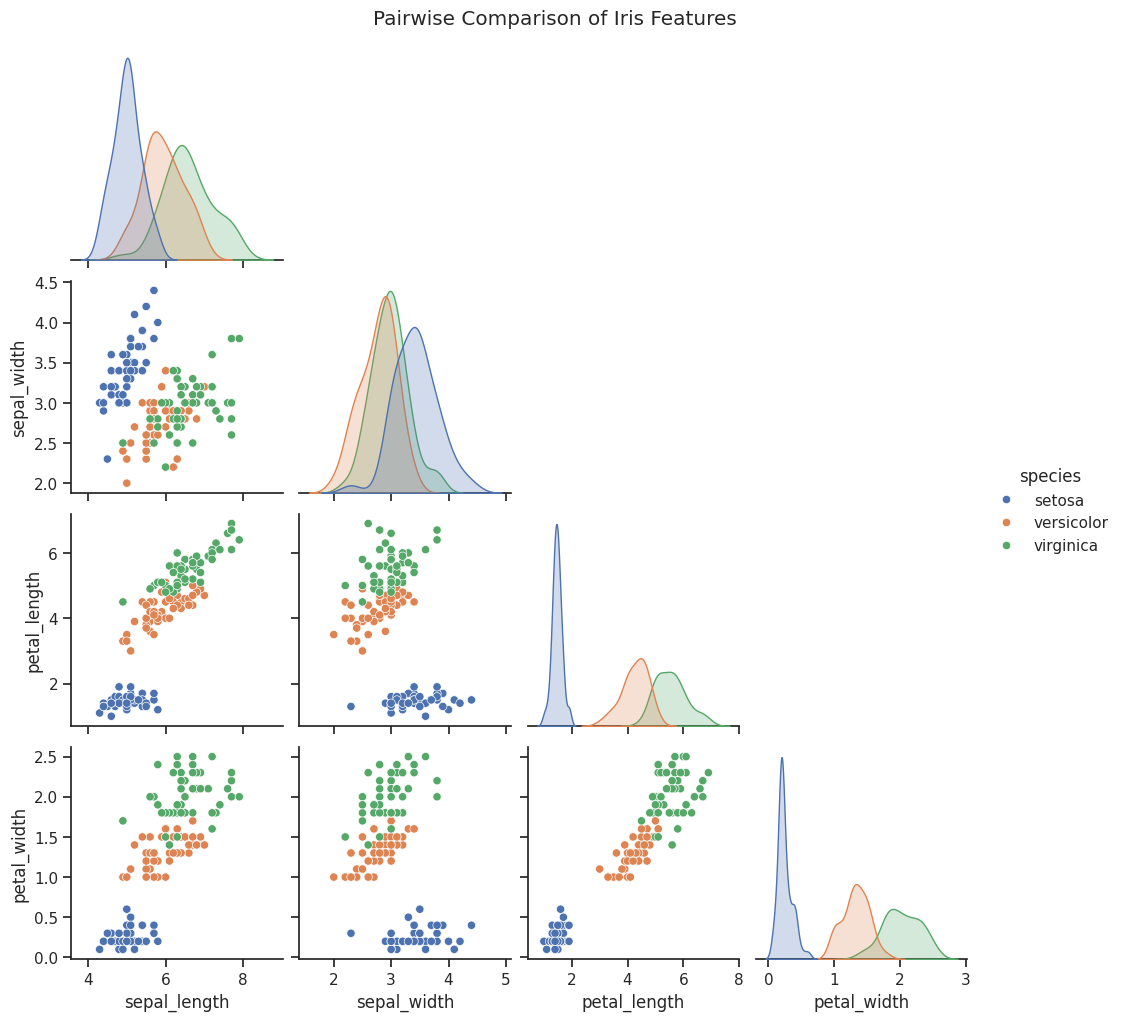

In [3]:
sns.set(style="ticks")
sns.pairplot(iris, hue="species", corner=True)
plt.suptitle("Pairwise Comparison of Iris Features", y=1.02)
plt.show()

- `pairplot()` draws scatter plots between all pairs of numeric columns.
- Color-coded by species.
- Corner=True avoids redundant upper triangle.


---

## Example 2: Seaborn Boxplot + Stripplot for Distribution & Outliers

**Goal:** Compare petal length across species.

/tmp/ipython-input-1440468257.py:3: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  sns.stripplot(data=iris, x="species", y="petal_length", hue="species",


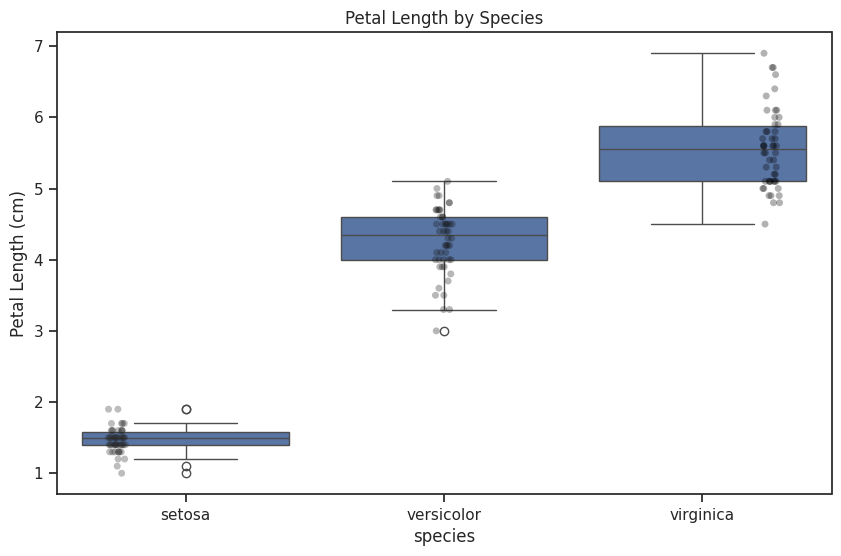

In [4]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=iris, x="species", y="petal_length")
sns.stripplot(data=iris, x="species", y="petal_length", hue="species",
              dodge=True, color="black", alpha=0.3)
plt.title("Petal Length by Species")
plt.ylabel("Petal Length (cm)")
plt.legend([], [], frameon=False)
plt.show()

### Explanation:
- `boxplot()` shows median, quartiles, and outliers.
- `stripplot()` overlays individual data points for transparency.
- Clean categorical labels ensure readability.

---

## Example 3: Plotly Interactive Bubble Plot

**Goal:** Create an interactive scatter plot with bubble sizes and hover info.

In [5]:
fig = px.scatter(
    iris,
    x="sepal_length",
    y="sepal_width",
    size="petal_length",
    color="species",
    hover_name="species",
    title="Interactive Iris Feature Bubble Plot",
    labels={"sepal_length": "Sepal Length (cm)", "sepal_width": "Sepal Width (cm)"},
    template="plotly_white"
)
fig.show()

### Explanation:
- Encodes three variables: X, Y, and bubble size.
- Hover text and colors enhance species comparison.
- Interactive zoom, pan, and tooltips are built-in.
